In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
wsc=np.loadtxt('data/Wholesale_customers_data.csv', delimiter=',', skiprows=1)
print( wsc.shape )
print(wsc[0])

(440, 8)
[2.0000e+00 3.0000e+00 1.2669e+04 9.6560e+03 7.5610e+03 2.1400e+02
 2.6740e+03 1.3380e+03]


In [3]:
channel = wsc[:, 0]
region = wsc[:, 1]
data = wsc[:,2:]
print(data.shape)
print(data)

(440, 6)
[[12669.  9656.  7561.   214.  2674.  1338.]
 [ 7057.  9810.  9568.  1762.  3293.  1776.]
 [ 6353.  8808.  7684.  2405.  3516.  7844.]
 ...
 [14531. 15488. 30243.   437. 14841.  1867.]
 [10290.  1981.  2232.  1038.   168.  2125.]
 [ 2787.  1698.  2510.    65.   477.    52.]]


In [4]:
uniq,counts=np.unique(channel,return_counts=True)
print("channel(Hotel:1,Retail:2)")
for i in range(len(uniq)):
    print("  {0:.0f}: {1}".format(uniq[i],counts[i]))
print("  total:",len(channel)) 

channel(Hotel:1,Retail:2)
  1: 298
  2: 142
  total: 440


In [5]:
uniq,counts=np.unique(region, return_counts=1)
print("channel(Lisbon:1, Oporto 1:2, Other: 3)")
for i in range(len(uniq)):
    print("  {0:.0f}: {1}".format(uniq[i],counts[i]))
print("  total:",len(channel)) 

channel(Lisbon:1, Oporto 1:2, Other: 3)
  1: 77
  2: 47
  3: 316
  total: 440


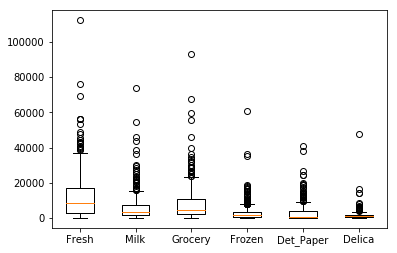

In [6]:
labels=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Det_Paper', 'Delica']

plt.boxplot(data)
plt.xticks([1,2,3,4,5,6],labels)
plt.show()

In [7]:
n_cls = 4
kmcls=KMeans(n_clusters=n_cls).fit_predict(data)
print(kmcls)
uniq,counts=np.unique(kmcls, return_counts=1)
print("channel(Lisbon:1, Oporto 1:2, Other: 3)")
for i in range(len(uniq)):
    print("  {0:.0f}: {1}".format(uniq[i],counts[i]))
print("  total:",len(channel)) 


[0 3 0 0 2 0 0 0 0 3 3 0 2 3 2 0 3 0 0 0 0 0 2 1 2 0 0 0 3 2 0 0 0 2 0 3 2
 3 3 2 2 0 3 3 0 3 3 1 0 3 0 0 2 3 2 0 3 3 0 0 0 1 0 3 0 1 0 0 0 0 0 3 0 0
 0 0 0 3 0 0 0 3 3 0 0 1 1 2 0 2 0 0 1 0 3 0 0 0 0 0 3 3 0 2 0 0 3 3 0 3 0
 3 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 3 0 0
 0 2 0 0 0 0 0 3 3 0 3 3 3 0 0 3 0 3 3 0 0 0 3 3 0 3 0 3 2 0 0 0 0 2 3 1 0
 0 0 3 3 3 0 0 0 3 0 0 2 3 0 0 3 3 2 0 0 3 0 0 0 3 0 1 0 0 3 3 3 0 3 0 0 3
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 2 2 0 0 3 3 0 0 0 0 0 1 0 2 0 2 0 0 2
 2 0 0 0 0 3 3 3 0 3 0 0 0 0 2 0 0 2 0 0 0 0 0 2 2 2 2 0 0 0 2 0 0 0 3 0 0
 0 0 0 0 0 3 3 3 3 3 3 0 0 3 0 2 3 0 0 3 0 0 0 3 0 0 0 0 2 2 0 0 0 0 0 3 0
 1 0 2 0 0 0 0 3 3 0 3 0 0 3 2 0 3 0 3 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 3 2 0 0 2 0 2 0 3 0 0 0 0 0 0 0 0 2 0 0 3 0 0 0 0 2 2 2 0 0 2
 3 0 0 0 0 3 0 0 0 3 3 3 0 3 0 2 0 0 0 3 2 0 0 3 0 0 0 0 2 2 3 0 0]
channel(Lisbon:1, Oporto 1:2, Other: 3)
  0: 276
  1: 11
  2: 58
  3: 95
  total: 440


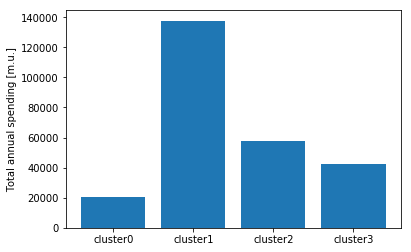

In [8]:
cls_total=[]
cls_x=[]
cls_xticks=[]
for i in range(n_cls):
    data1=data[kmcls==i]
    ave=np.mean(np.sum(data1, axis=1))
    cls_total.append(ave)
    cls_x.append(i)
    cls_xticks.append("cluster{0}".format(i))
plt.bar(cls_x, cls_total)
plt.xticks(cls_x, cls_xticks)
plt.ylabel("Total annual spending [m.u.]")
plt.show()

[2508140.  835570. 1035970.  777764.  276829.  287185.]
[9087.46376812 3027.42753623 3753.51449275 2817.98550725 1003.00362319
 1040.52536232]


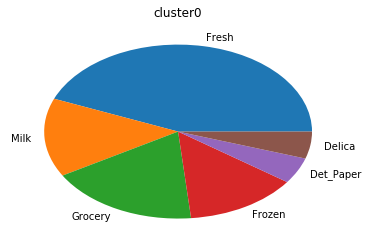

[218771. 397566. 500692.  69618. 235588.  92554.]
[19888.27272727 36142.36363636 45517.45454545  6328.90909091
 21417.09090909  8414.        ]


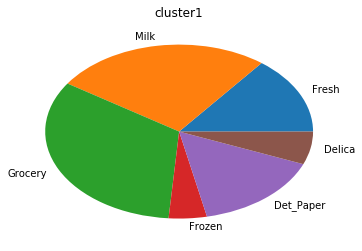

[2096380.  317345.  355470.  365322.   61712.  134370.]
[36144.48275862  5471.46551724  6128.79310345  6298.65517241
  1064.          2316.72413793]


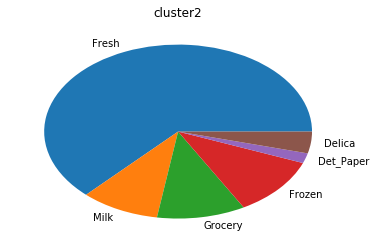

[ 456840.  999876. 1606430.  138946.  693728.  156834.]
[ 4808.84210526 10525.01052632 16909.78947368  1462.58947368
  7302.4         1650.88421053]


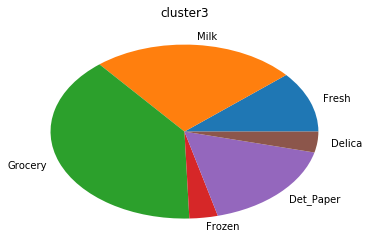

In [16]:
for i in range(n_cls):
    data1=data[kmcls==i]
    print(sum(data1))
    print(np.mean(data1, axis=0))
    plt.pie(sum(data1), labels=labels)
    plt.title("cluster{0}".format(i))
    plt.show()

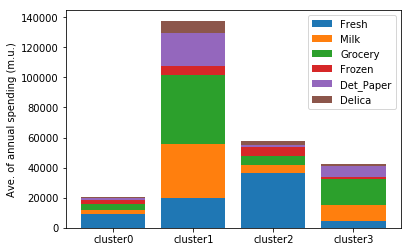

In [10]:
height=np.zeros(n_cls)
for i in range(len(labels)):
    data_pr=data[:, i]
    ave=[]
    for j in range(n_cls):
        ave.append(np.mean(data_pr[kmcls==j]))
    plt.bar(cls_x, ave, bottom=height, label=labels[i])
    height+=ave
plt.xticks(cls_x, cls_xticks)
plt.ylabel("Ave. of annual spending (m.u.)")
plt.legend()
plt.show()